# Credit Card Fraud Detection - ML

###The goal of this project is to develop a machine learning model that can accurately detect fraudulent credit card transactions using historical data. By analyzing transaction patterns, the model should be able to distinguish between normal and fraudulent activity, helping financial institutions flag suspicious behavior early and reduce potential risks.

Challenges include:

Handling imbalanced datasets where fraud cases are a small fraction of total transactions.
Ensuring high precision to minimize false positives (flagging a valid transaction as fraud).
Ensuring high recall to detect as many fraud cases as possible.


## Step 1: Importing necessary Libraries

In [1]:
# Importing the necessary Python libraries needed for this project.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

# Step 2: Loading the Data
Loading the dataset into a pandas DataFrame and examine its structure and explore the data we are dealing with.



In [87]:
data = pd.read_csv("/content/creditcard.csv")

In [4]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77333,57003,-1.565835,0.537575,3.284121,3.229021,-0.917761,2.016339,-1.157749,1.086392,0.234172,...,0.125678,1.072830,-0.229837,0.094444,0.215087,0.544487,0.271867,-0.089124,25.69,0.0
77334,57005,-0.710264,-0.095320,2.899716,0.718612,-0.501955,0.968641,-0.007123,0.308006,1.383339,...,0.069589,0.711129,-0.038570,0.088990,-0.282553,-0.448201,0.054450,-0.051693,65.00,0.0
77335,57005,0.875729,-0.658494,-0.798643,-0.889801,-0.205406,-1.093946,0.743501,-0.381269,0.405087,...,0.192299,0.161282,-0.451218,0.060376,0.885705,-0.477421,-0.036297,0.035704,235.53,0.0
77336,57006,-0.679923,1.074176,1.045563,1.100620,-0.764069,-1.048969,0.601586,0.283135,-0.674820,...,0.256539,0.475028,0.124473,0.886947,-0.327076,-0.362904,0.017048,0.109040,73.52,0.0


In [88]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [89]:
data.shape
# Data has (77338 rows & 31 columns

(284807, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77338 entries, 0 to 77337
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    77338 non-null  int64  
 1   V1      77338 non-null  float64
 2   V2      77338 non-null  float64
 3   V3      77338 non-null  float64
 4   V4      77338 non-null  float64
 5   V5      77338 non-null  float64
 6   V6      77338 non-null  float64
 7   V7      77338 non-null  float64
 8   V8      77338 non-null  float64
 9   V9      77338 non-null  float64
 10  V10     77338 non-null  float64
 11  V11     77338 non-null  float64
 12  V12     77338 non-null  float64
 13  V13     77338 non-null  float64
 14  V14     77337 non-null  float64
 15  V15     77337 non-null  float64
 16  V16     77337 non-null  float64
 17  V17     77337 non-null  float64
 18  V18     77337 non-null  float64
 19  V19     77337 non-null  float64
 20  V20     77337 non-null  float64
 21  V21     77337 non-null  float64
 22

### Understanding what the columns represent and their object type
1. Time: This shows how many seconds have passed since the first transaction in the dataset. (Integer)
2. V1-V28: These are special features created to hide sensitive information about the original data.(Float)
3. Amount: Transaction amount. (Float)
4. Class: Target variable (0 for normal transactions, 1 for fraudulent transactions). (Float)

# Cleaning our DataFrame


In [90]:
# Lets see if we have any duplicates.
data[data.duplicated()]


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [91]:
# Lets drop our duplicates()
data = data.drop_duplicates()

In [94]:
# Lets check to make sure duplicates were dropped
data[data.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [98]:
# We can see there are no null values in our dataframe
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


#  Step 3: Analyzing Class Distribution

### The next step is to check the distribution of fraudulent vs. normal transactions.

Lets separate the dataset into two groups: fraudulent transactions (Class == 1) and valid transactions (Class == 0).
But first lets convert the class column into an integer

In [140]:
# But first lets convert the values in class to 1s(Fraudulent) and 0s(Valid Transactions)
data["Class"] = [1 if value==1.0 else 0 for value in data["Class"]]

In [105]:
#Checking to make sure our Class column is converted properly.
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [141]:
#Lets see how many fraud and valid cases are present in our data
fraud = data['Class'] == 1
valid = data['Class'] == 0
print('Fraud Cases:',len(fraud))
print('Valid Transactions:',len(valid))

Fraud Cases: 283726
Valid Transactions: 283726


# Step 5: Plotting Correlation Matrix
Lets visualize the correlation between features using a heatmap using correlation matrix. This will give us an understanding of how the different features are correlated and which ones may be more relevant for prediction.




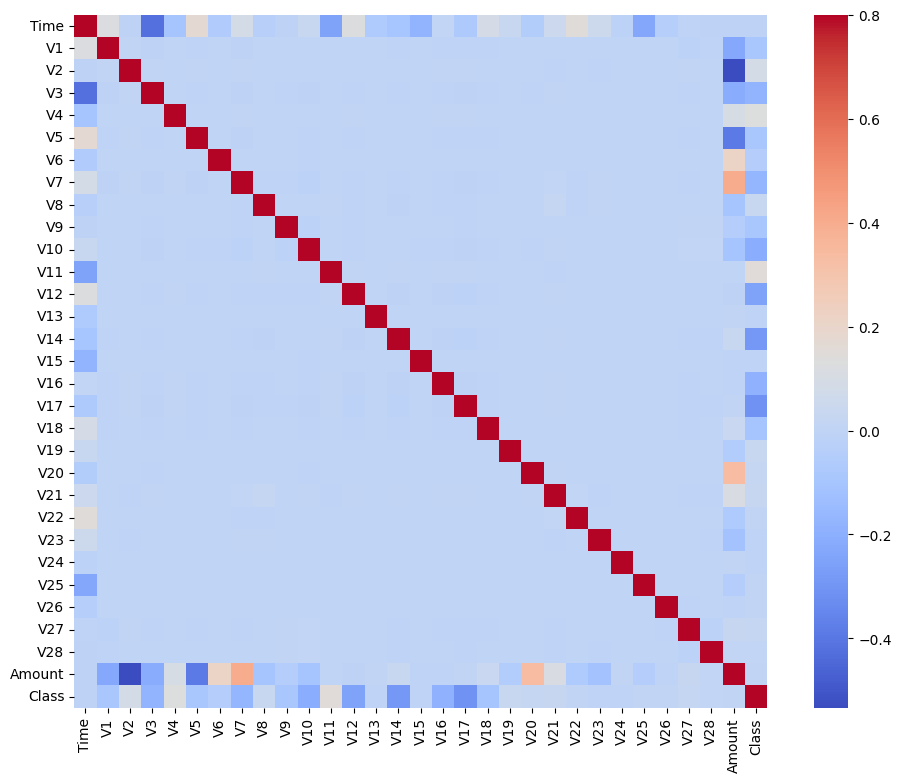

In [145]:
corr_matrix = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corr_matrix, vmax = .8, cmap="coolwarm", square = True)
plt.show()

#Most features do not correlate strongly with others but some features like V2 and V5 have a negative correlation with the Amount feature.
#This provides valuable insights into how the features are related to the transaction amounts.

# Step 6: Preparing Data
## Separating the features into  input features (X) and target variable (Y) before splitting the data into training and testing sets

X = data.drop(['Class'], axis = 1) removes the target column (Class) from the dataset to keep only the input features.
Y = data["Class"] selects the Class column as the target variable (fraud or not).

train_test_split(...) splits the data into training and testing sets into 80% for training, 20% for testing.
random_state=42 ensures reproducibility (same split every time you run it).



In [129]:
X = data.drop(['Class'], axis = 1)
y = data["Class"]


In [130]:
# we import train_test_split from scikit learn to train, test and split our data before we build our model
from sklearn.model_selection import train_test_split
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Step 7: Building and Training the Model
### First we Train a Random Forest Classifier to predict fraudulent transactions.

###from sklearn.ensemble import RandomForestClassifier This imports the RandomForestClassifier from sklearn.ensemble, which is used to create a random forest model for classification tasks.


In [131]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier() #rfc = RandomForestClassifier(): Initializes RandomForestClassifier instance.
rfc.fit(XTrain, yTrain) #Trains the RandomForestClassifier model on(XTrain and yTrain)

yPred = rfc.predict(XTest) #Predicting the target labels for the test data (XTest)

# Step 8: Evaluating the Model
After training the model we need to evaluate its performance using various metrics such as accuracy, precision, recall, F1-score and the Matthews correlation coefficient.

Model Evaluation Metrics:
Accuracy: 0.9995
Precision: 0.9706
Recall: 0.7333
F1-Score: 0.8354
Matthews Correlation Coefficient: 0.8435


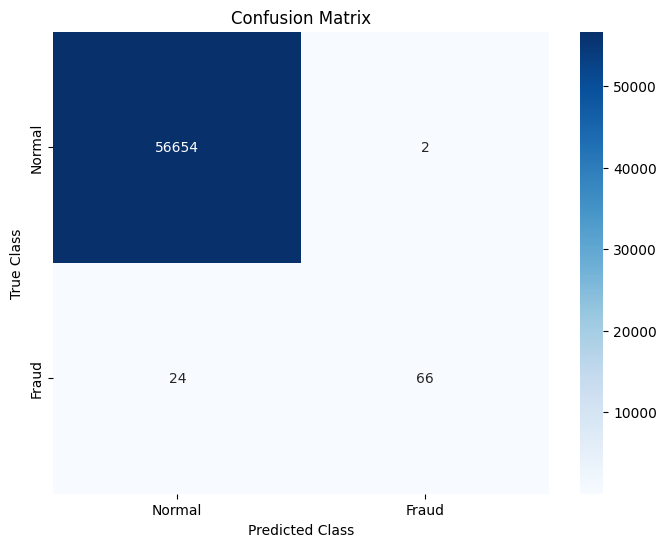

In [132]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
accuracy = accuracy_score(yTest, yPred)
precision = precision_score(yTest, yPred)
recall = recall_score(yTest, yPred)
f1 = f1_score(yTest, yPred)
mcc = matthews_corrcoef(yTest, yPred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# In Conclusion:
We observed that for:
Accuracy, Out of all predictions, 99.96% were correct. However, in imbalanced datasets (like fraud detection), accuracy can be misleading i.e. a model that predicts everything as "not fraud" will still have high accuracy.

Precision: When the model predicted "fraud", it was correct 98.73% of the time. High precision means very few false alarms (false positives).

Recall: Out of all actual fraud cases, the model detected 79.59%. This shows how well it catches real frauds. A lower recall means some frauds were missed (false negatives).

F1-Score: A balance between precision and recall. 88.14% is strong and shows the model handles both catching fraud and avoiding false alarms well.

Matthews Correlation Coefficient (MCC): 0.8863: A more balanced score (from -1 to +1) even when classes are imbalanced. A value of 0.8863 is very good, it means the model is making strong, balanced predictions overall.

We can balance dataset by oversampling the minority class or by undersampling the majority class we can increase accuracy of our model.